In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_columns', None)



In [4]:
df = pd.read_csv("/content/nyc-rolling-sales.csv")
print(df.shape)
df.head()

(84548, 22)


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df.loc[df["LAND SQUARE FEET"].str.contains("-"), "LAND SQUARE FEET"] = np.nan
df.loc[df["GROSS SQUARE FEET"].str.contains("-"), "GROSS SQUARE FEET"] = np.nan

df["LAND SQUARE FEET"] = df["LAND SQUARE FEET"].astype("float64")
df["GROSS SQUARE FEET"] = df["GROSS SQUARE FEET"].astype("float64")

In [6]:
df.drop(["EASE-MENT"], axis=1,inplace=True)

In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   BUILDING CLASS AT PRESENT       84548 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                84548 non-null  object 
 10  ZIP CODE                        84548 non-null  int64  
 11  RESIDENTIAL UNITS               84548 non-null  int64  
 12  COMMERCIAL UNITS                

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000


In [8]:
df = df[df["RESIDENTIAL UNITS"]<=1000]
df = df[df["COMMERCIAL UNITS"]<=1000]

df.loc[df["YEAR BUILT"]<1900, "YEAR BUILT"]=1900

In [9]:
df[df["LAND SQUARE FEET"]>1000000]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76695,561,5,BLOOMFIELD,27 FACTORIES,4,1801,75,F2,1900 SOUTH AVENUE,,10314,0,1,1,1225085.0,20000.0,1997,4,F2,-,2016-09-01 00:00:00
76696,562,5,BLOOMFIELD,31 COMMERCIAL VACANT LAND,4,1760,25,V1,BLOOMFIELD AVENUE,,10314,0,0,0,1448801.0,NaN,1900,4,V1,31500000,2017-03-10 00:00:00
76697,563,5,BLOOMFIELD,31 COMMERCIAL VACANT LAND,4,1760,35,V1,BLOOMFIELD AVENUE,,10314,0,0,0,2122958.0,NaN,1900,4,V1,67200000,2017-03-10 00:00:00
76698,564,5,BLOOMFIELD,31 COMMERCIAL VACANT LAND,4,1760,45,V1,BLOOMFIELD AVENUE,,10314,0,0,0,2549173.0,NaN,1900,4,V1,10050000,2017-03-10 00:00:00
76700,566,5,BLOOMFIELD,31 COMMERCIAL VACANT LAND,4,1835,150,V1,500 BLOOMFIELD ROAD,,0,0,0,0,4252327.0,NaN,1900,4,V1,122000000,2016-11-16 00:00:00
81334,5200,5,NEW SPRINGVILLE,22 STORE BUILDINGS,4,2400,180,K6,2655 RICHMOND AVENUE,,10314,0,126,126,1865243.0,683200.0,1975,4,K6,711008,2017-03-17 00:00:00
81335,5201,5,NEW SPRINGVILLE,22 STORE BUILDINGS,4,2400,180,K6,2655 RICHMOND AVENUE,,10314,0,126,126,1865243.0,683200.0,1975,4,K6,4223025,2017-03-17 00:00:00
82569,6435,5,ROSSVILLE-PORT MOBIL,34 THEATRES,4,7187,1,Y3,2911 ARTHUR KILL ROAD,,10309,0,0,0,3014056.0,349503.0,1971,4,J9,7211750,2017-08-08 00:00:00
83181,7047,5,TODT HILL,33 EDUCATIONAL FACILITIES,4,683,1,W1,715 OCEAN TERRACE,,10301,0,1,1,2128899.0,240.0,1965,4,W1,1,2016-11-14 00:00:00


In [10]:
df[df["RESIDENTIAL UNITS"] == 0]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,NaN,NaN,1920,2,C6,1,2016-09-06 00:00:00
13,17,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,NaN,NaN,1920,2,C6,499000,2017-03-10 00:00:00
14,18,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 3A",,10009,0,0,0,NaN,NaN,1920,2,C6,10,2017-04-28 00:00:00
15,19,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",,10009,0,0,0,NaN,NaN,1920,2,C6,529500,2017-06-09 00:00:00
16,20,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 2E",,10009,0,0,0,NaN,NaN,1920,2,C6,423000,2017-07-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84414,8280,5,WILLOWBROOK,44 CONDO PARKING,4,1965,1158,RG,1235 FOREST HILL ROAD,P35,10314,0,0,1,NaN,NaN,2015,4,RG,-,2017-04-28 00:00:00
84415,8281,5,WILLOWBROOK,44 CONDO PARKING,4,1965,1159,RG,1235 FOREST HILL ROAD,P36,10314,0,0,1,NaN,NaN,2015,4,RG,-,2017-04-24 00:00:00
84416,8282,5,WILLOWBROOK,44 CONDO PARKING,4,1965,1160,RG,1235 FOREST HILL ROAD,P37,10314,0,0,1,NaN,NaN,2015,4,RG,-,2017-06-19 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337,2016-12-21 00:00:00


In [11]:
univ_num_cols = ["BOROUGH", "BLOCK", "LOT", "RESIDENTIAL UNITS",	"COMMERCIAL UNITS","TOTAL UNITS", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "LAND SQUARE FEET", "GROSS SQUARE FEET"]
univ_cat_cols = ["BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT"]

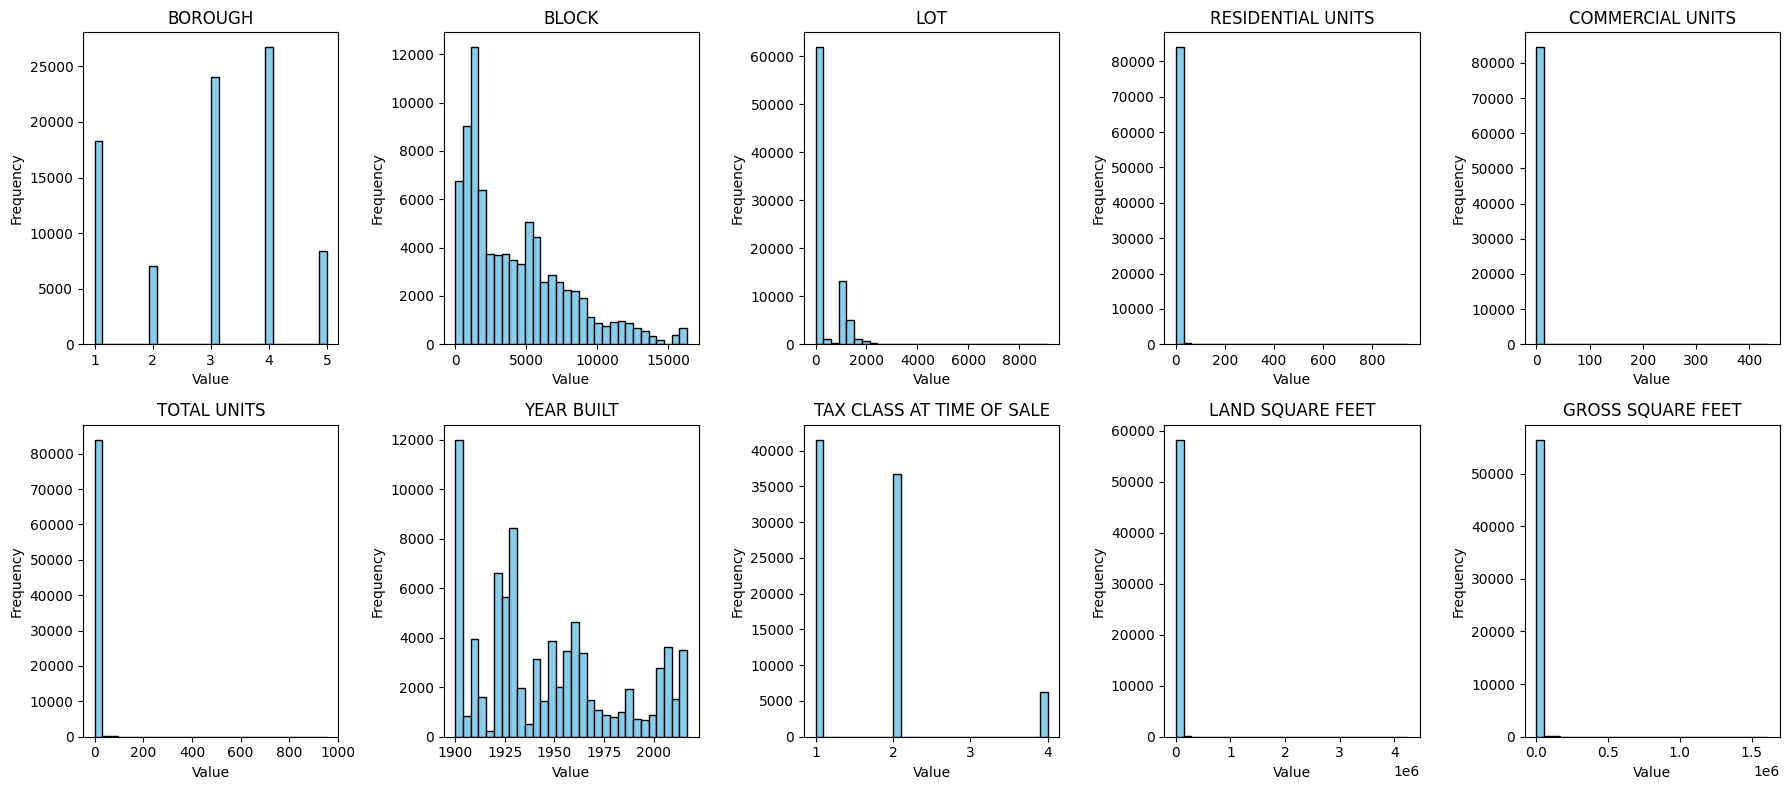

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))

axes = axes.flatten()

for i, column in enumerate(univ_num_cols):
    ax = axes[i]
    ax.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
univ_cat_cols

['BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT']

In [14]:
df_1 = df.groupby("BUILDING CLASS CATEGORY").size().reset_index().rename(columns={0:"size"})
df_1.sort_values("size", ascending=False)

,BUILDING CLASS CATEGORY,size
0,01 ONE FAMILY DWELLINGS,18235
1,02 TWO FAMILY DWELLINGS,15828
13,13 CONDOS - ELEVATOR APARTMENTS,12989
9,10 COOPS - ELEVATOR APARTMENTS,12899
2,03 THREE FAMILY DWELLINGS,4384
6,07 RENTALS - WALKUP APARTMENTS,3466
8,09 COOPS - WALKUP APARTMENTS,2767
3,04 TAX CLASS 1 CONDOS,1656
41,44 CONDO PARKING,1441
15,15 CONDOS - 2-10 UNIT RESIDENTIAL,1281


In [15]:
df_1 = df.groupby("TAX CLASS AT PRESENT").size().reset_index().rename(columns={0:"size"})
df_1.sort_values("size", ascending=False)

,TAX CLASS AT PRESENT,size
1,1,38633
5,2,30916
10,4,6139
6,2A,2521
8,2C,1915
2,1A,1444
3,1B,1234
7,2B,814
0,,738
4,1C,186


In [16]:
df_1 = df.groupby('BUILDING CLASS AT PRESENT').size().reset_index().rename(columns={0:"size"})
df_1.sort_values("size", ascending=False)

,BUILDING CLASS AT PRESENT,size
29,D4,12660
121,R4,12482
2,A1,6753
6,A5,5683
11,B2,4923
...,...,...
68,I3,1
124,R7,1
64,HH,1
24,CM,1


# Bivariate Analysis

In [17]:
df_tr = df[df["SALE PRICE"].str.contains("-")==False]
df_tr["SALE PRICE"] = df_tr["SALE PRICE"].astype(float)

<ipython-input-17-30b4f944b188>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr["SALE PRICE"] = df_tr["SALE PRICE"].astype(float)


<Axes: >

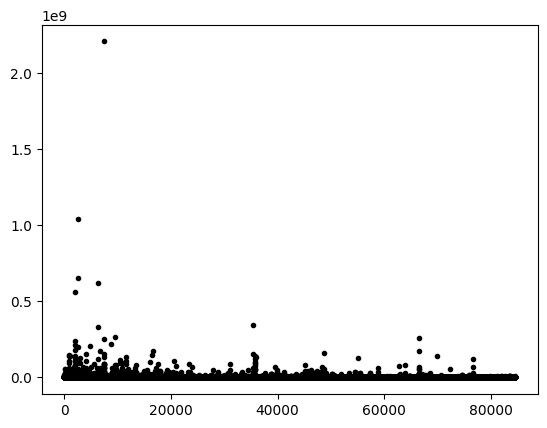

In [18]:
df_tr["SALE PRICE"].plot(style=".k")

In [19]:
df_tr[df_tr["SALE PRICE"]>2000000000]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7447,7451,1,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1301,1,O4,245 PARK AVENUE,,10167,0,35,35,81336.0,1586886.0,1966,4,O4,2.210000e+09,2017-05-05 00:00:00


In [20]:

df_tr["building_class"] = df_tr["BUILDING CLASS CATEGORY"].apply(lambda x: ''.join(re.findall(r'\d+', x))).astype(float)
df_tr["tax_class"] = df_tr["TAX CLASS AT PRESENT"].apply(lambda x: ''.join(re.findall(r'\d+', x))).replace("", "1").astype(float)
df_tr.drop(['BUILDING CLASS AT PRESENT'], axis=1, inplace=True)


<ipython-input-20-dbb6e413128c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr["building_class"] = df_tr["BUILDING CLASS CATEGORY"].apply(lambda x: ''.join(re.findall(r'\d+', x))).astype(float)
<ipython-input-20-dbb6e413128c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr["tax_class"] = df_tr["TAX CLASS AT PRESENT"].apply(lambda x: ''.join(re.findall(r'\d+', x))).replace("", "1").astype(float)
<ipython-input-20-dbb6e413128c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [21]:
bivar_cols = univ_num_cols + ["building_class", "tax_class"]

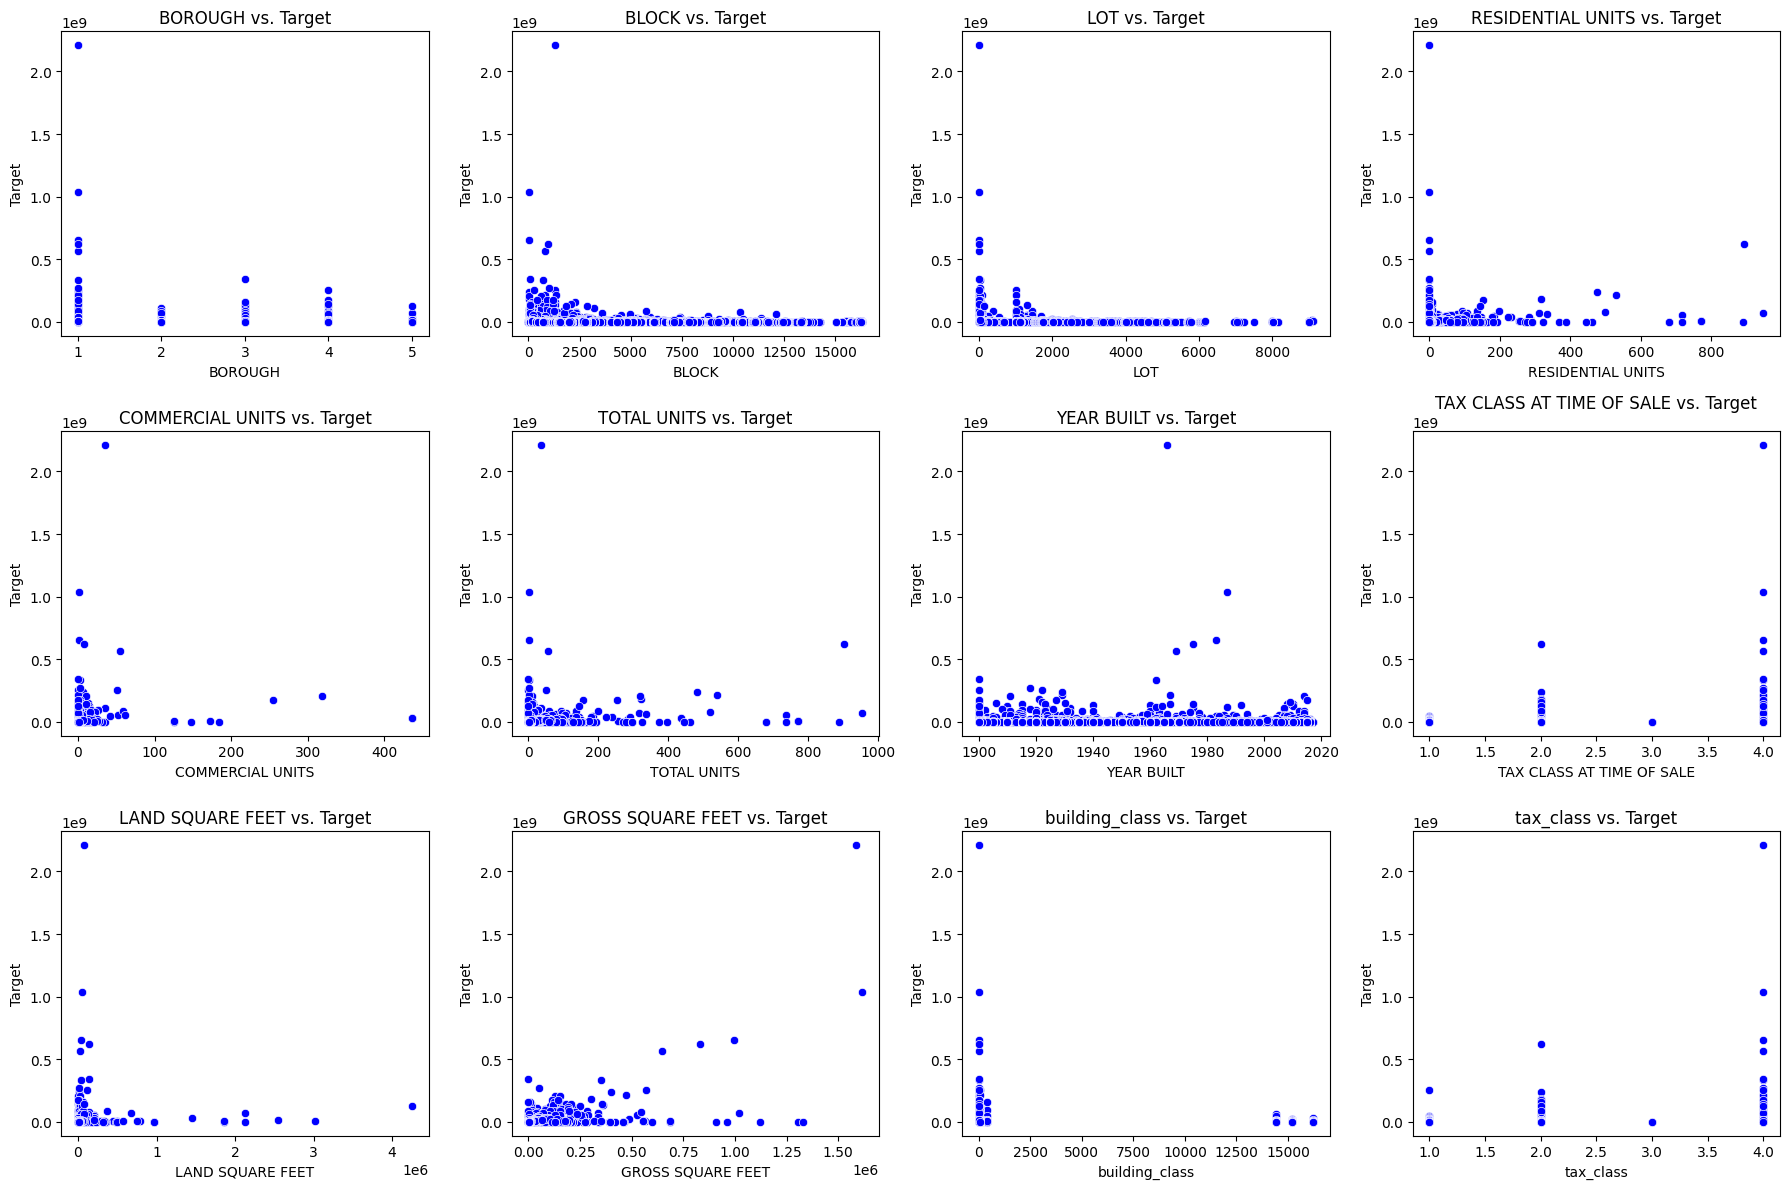

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

axes = axes.flatten()

for i, column in enumerate(bivar_cols):  # Exclude the target variable
    ax = axes[i]
    sns.scatterplot(x=column, y='SALE PRICE', data=df_tr, ax=ax, color='blue')
    ax.set_title(f'{column} vs. Target')
    ax.set_xlabel(column)
    ax.set_ylabel('Target')

plt.tight_layout()

plt.show()


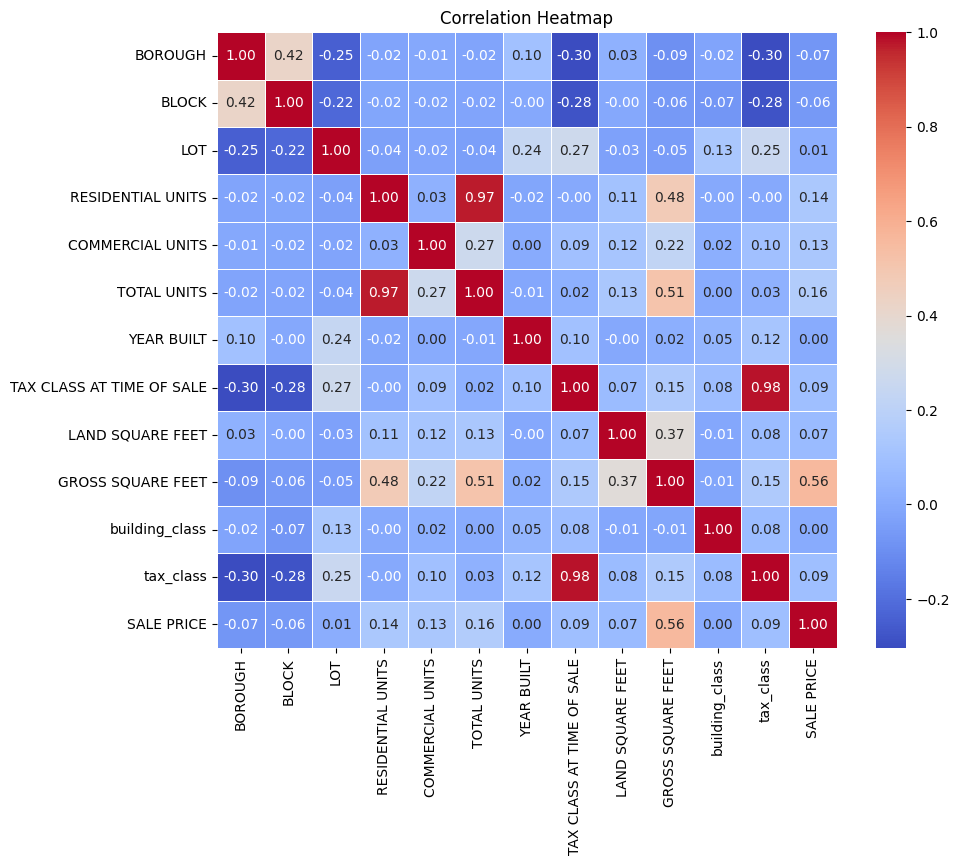

In [23]:
correlation_matrix = df_tr[bivar_cols + ["SALE PRICE"]].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()